# Task 1: Denoising Images with Autoencoders

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 175ms/step - loss: 0.6089 - val_loss: 0.5831
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 153ms/step - loss: 0.5813 - val_loss: 0.5805
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 147ms/step - loss: 0.5789 - val_loss: 0.5789
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 142ms/step - loss: 0.5780 - val_loss: 0.5782
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 151ms/step - loss: 0.5771 - val_loss: 0.5776
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - loss: 0.5770 - val_loss: 0.5773
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 146ms/step - loss: 0.5769 - val_loss: 0.5770
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - loss: 0.5761 - val_loss: 0.5769
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 54s 138ms/step - loss: 0.5757 - val_loss: 0.5764
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 142ms/step - loss: 0.5752 - val_loss: 0.5762
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


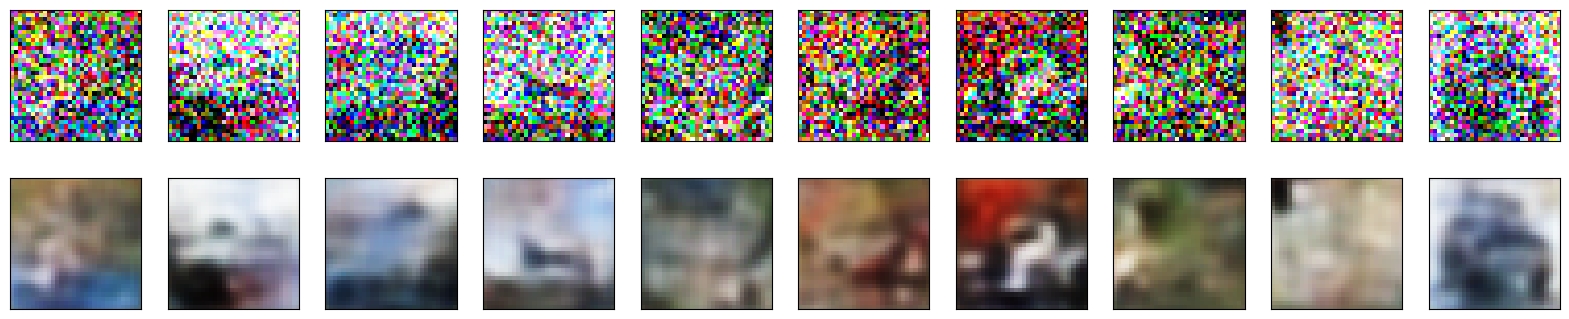

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# Define the autoencoder model
input_img = tf.keras.layers.Input(shape=(32, 32, 3))

# Encoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict on the noisy test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display the results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Task 2: CIFAR-10 Dataset Reconstruction Using Variational Autoencoder (VAE)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - loss: 0.0567 - val_loss: 0.0271
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - loss: 0.0263 - val_loss: 0.0221
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - loss: 0.0201 - val_loss: 0.0182
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - loss: 0.0175 - val_loss: 0.0161
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - loss: 0.0162 - val_loss: 0.0165
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - loss: 0.0156 - val_loss: 0.0152
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - loss: 0.0152 - val_loss: 0.0147
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - loss: 0.0145 - val_loss: 0.0153
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - loss: 0.0143 - val_loss: 0.0141
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - loss: 0.0139 - val_loss: 0.0137
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step


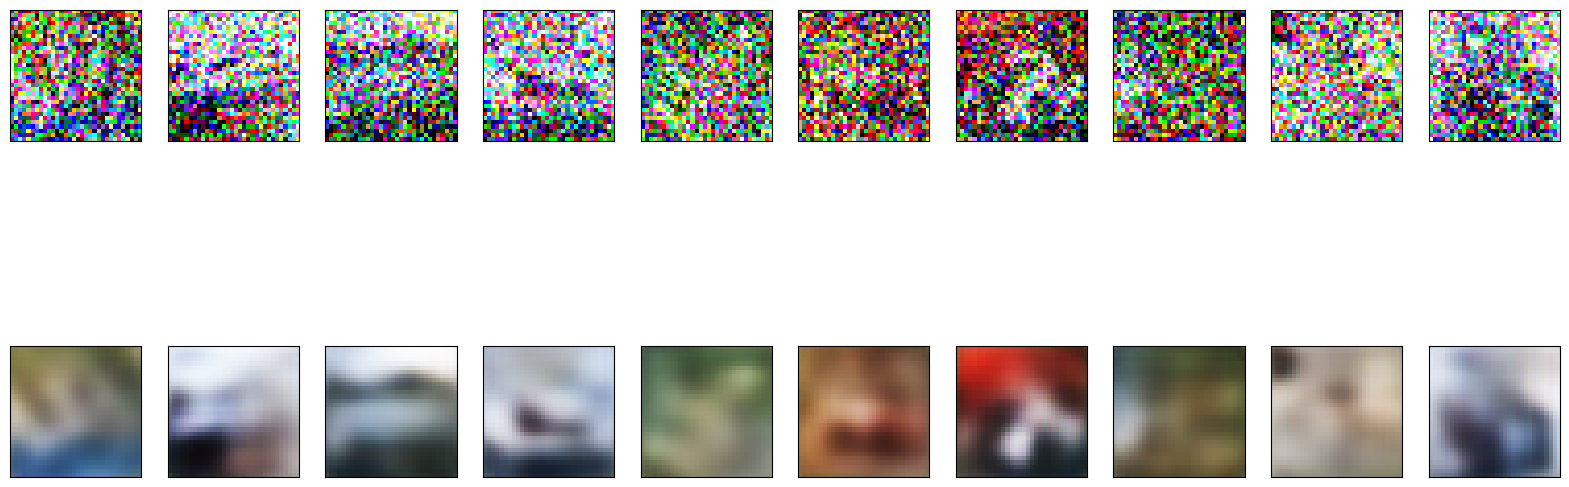


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 214ms/step - loss: 2114.5640
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - loss: 2050.5132
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 210ms/step - loss: 2017.6959
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - loss: 1979.1559
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - loss: 1957.4441
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 213ms/step - loss: 1963.7241
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - loss: 1957.8848
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 210ms/step - loss: 1958.0480
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 215ms/step - loss: 1956.4644
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - loss: 1955.1151
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


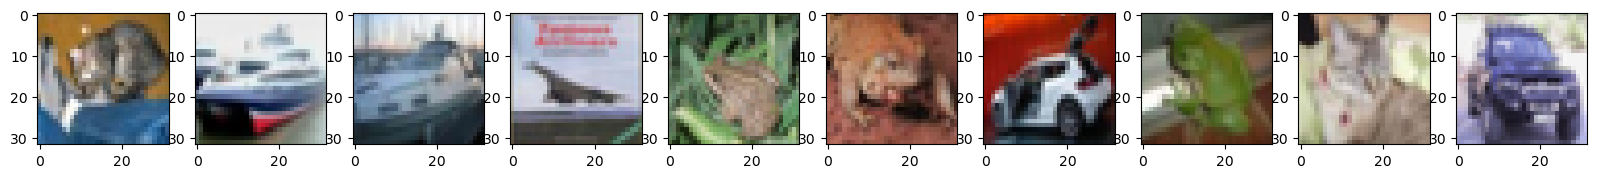

In [4]:
# prompt: please show complete corrected code instead of "Your existing code"

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Download and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Reduce the dataset size to mitigate memory issues
x_train = x_train[:10000]  # Use only the first 10000 samples
x_test = x_test[:1000]     # Use only the first 1000 samples
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# Define the autoencoder model with more layers and filters
input_img = tf.keras.layers.Input(shape=(32, 32, 3))

# Encoder
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img) # Increased filters
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x) # Increased filters
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x) # Increased filters and added layer
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x) # Increased filters
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x) # Increased filters
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse') # Changed loss to mse

# Train the autoencoder for more epochs
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,  # Increased epochs
                batch_size=256, # Increased batch size
                shuffle=True,
                validation_data=(x_test_noisy, x_test)) 

# Predict on the noisy test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display the results
n = 10
plt.figure(figsize=(20, 8)) # Increased figure size for better visibility
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Define the sampling layer for VAE
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


latent_dim = 2

# Define the encoder
encoder_inputs = tf.keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Define the decoder
latent_inputs = tf.keras.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2D(3, 3, activation="sigmoid", padding="same")(x)
decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")

# Define the VAE
outputs = decoder(encoder(encoder_inputs)[2])
vae = tf.keras.Model(encoder_inputs, outputs, name="vae")

# Define a custom loss function
def vae_loss(encoder_inputs, outputs):
    # Reconstruction loss
    reconstruction_loss = tf.keras.losses.binary_crossentropy(encoder_inputs, outputs)
    reconstruction_loss *= 32 * 32 * 3

    # KL divergence loss
    z_mean, z_log_var, z = encoder(encoder_inputs)
    kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
    kl_loss = tf.reduce_mean(kl_loss)
    kl_loss *= -0.5

    # Total loss
    total_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    return total_loss

vae.compile(optimizer='adam', loss=vae_loss)  # Use the custom loss function

# Train the VAE
vae.fit(x_train, x_train, epochs=10, batch_size=128)

# Predict on the test images
decoded_imgs = vae.predict(x_test)

# Display the results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.show